In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load
ica_roots = load("../data/ica_roots.joblib")
arima_roots = load("../data/arima_roots.joblib")

Text(0, 0.5, 'count')

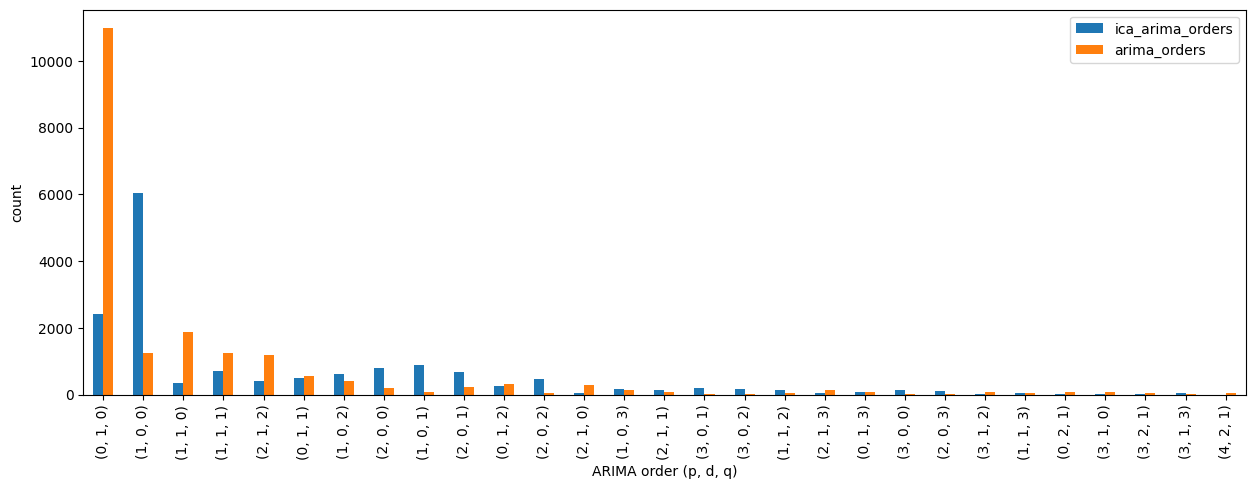

In [2]:
#
# --- fitted arima orders ---
#
n_train_days = 120
tick = "24h"
ica_orders = pd.read_csv(f"../data/ica_arma_orders_{tick}_{n_train_days}D.csv", index_col=0)
arima_orders = pd.read_csv(f"../data/arma_orders_{tick}_{n_train_days}D.csv", index_col=0)
orders = pd.concat((
    ica_orders.unstack().value_counts().rename("ica_arima_orders"),
    arima_orders.unstack().value_counts().rename("arima_orders")
    ), axis=1, join="inner")

orders.iloc[np.argsort(orders.sum(axis=1))[:-30:-1]].plot.bar(figsize=(15, 5))
plt.xlabel("ARIMA order (p, d, q)")
plt.ylabel("count")

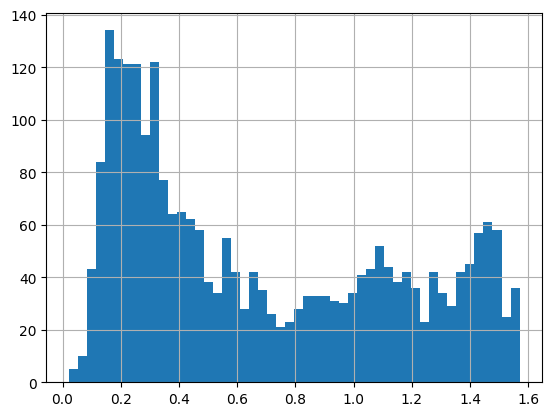

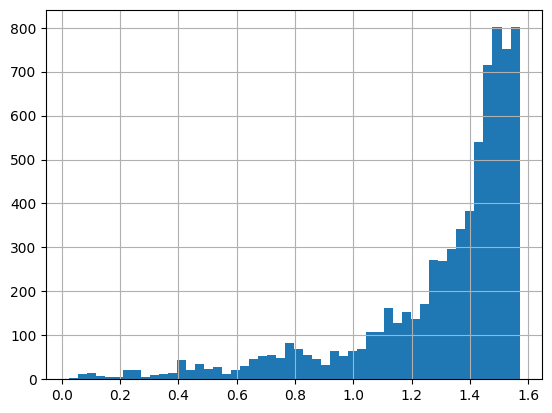

In [3]:
ar_roots_ica = pd.DataFrame(ica_roots).applymap(lambda x: x[0]).unstack().explode()**-1
ar_roots_ica = pd.DataFrame({
    "real": ar_roots_ica.map(lambda x: x.real),
    "imag": ar_roots_ica.map(lambda x: x.imag)
    })
ica_wave_length = np.arctan(ar_roots_ica["imag"] / ar_roots_ica["real"])
#ica_wave_length = 2*np.pi / np.arctan(ar_roots_ica["imag"] / ar_roots_ica["real"])

ica_wave_length[(ica_wave_length > 0) & np.isfinite(ica_wave_length.values)].hist(bins=50)
plt.show()

ar_roots_arima = pd.DataFrame(arima_roots).applymap(lambda x: x[0]).unstack().explode()**-1
ar_roots_arima = pd.DataFrame({
    "real": ar_roots_arima.map(lambda x: x.real),
    "imag": ar_roots_arima.map(lambda x: x.imag)
    })
arima_wave_length = np.arctan(ar_roots_arima["imag"] / ar_roots_arima["real"])
#arima_wave_length = 2*np.pi / np.arctan(ar_roots_arima["imag"] / ar_roots_arima["real"])

arima_wave_length[(arima_wave_length > 0) & np.isfinite(arima_wave_length)].hist(bins=50)
plt.show()

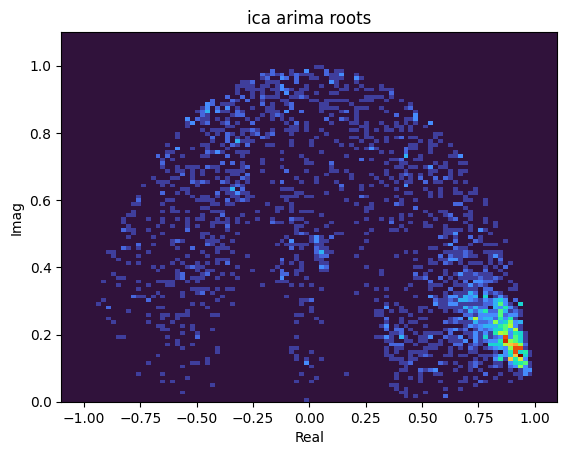

Text(0, 0.5, 'Imag')

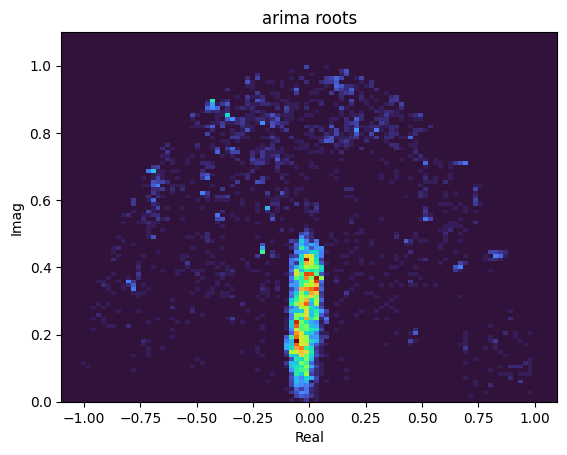

In [4]:
max_range = 1.1
#cmax = 250
#cmax = 100
cmax = None
#cmax = 50
cmap = "turbo"
#cmap = None
plt.hist2d(
    ar_roots_ica["real"].loc[ar_roots_ica["imag"] != 0], 
    ar_roots_ica["imag"].loc[ar_roots_ica["imag"] != 0],
    #cmin=1,
    cmax=cmax,
    range=[[-max_range, max_range], [0, max_range]],
    bins=100,
    cmap=cmap);
plt.title("ica arima roots")
plt.xlabel("Real")
plt.ylabel("Imag")
plt.show()

plt.hist2d(
    ar_roots_arima["real"].loc[ar_roots_arima["imag"] != 0], 
    ar_roots_arima["imag"].loc[ar_roots_arima["imag"] != 0],
    #cmin=1,
    cmax=cmax,
    range=[[-max_range, max_range], [0, max_range]],
    bins=100,
    cmap=cmap);
plt.title("arima roots")
plt.xlabel("Real")
plt.ylabel("Imag")

<Axes: >

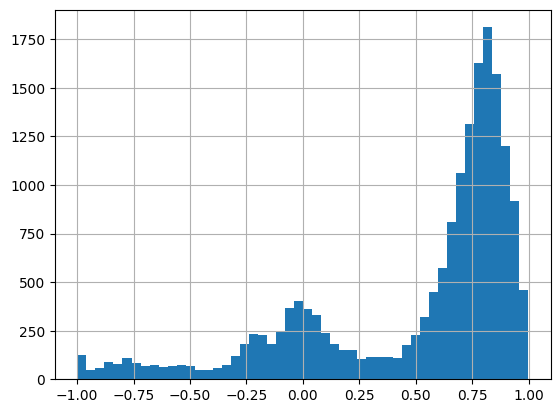

In [5]:
ar_roots_ica["real"].loc[ar_roots_ica["imag"] == 0].hist(bins=50)

<Axes: >

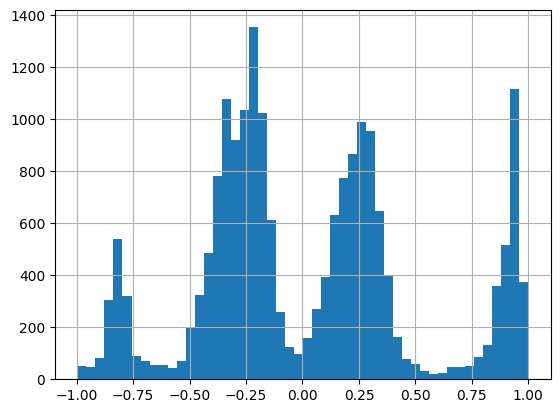

In [6]:
ar_roots_arima["real"].loc[ar_roots_arima["imag"] == 0].hist(bins=50)